# **Task1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

In [3]:
k =3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled.iloc[:,:-1]), columns=['PC1', 'PC2'])
df_pca['cluster'] = df_scaled['cluster']

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


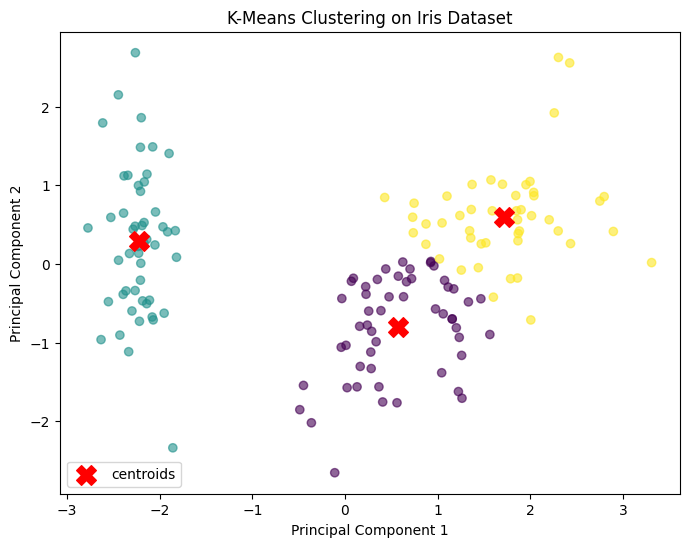

In [5]:
plt.figure(figsize = (8,6))
plt.scatter(df_pca['PC1'],df_pca['PC2'],c=df_pca["cluster"],cmap = 'viridis', alpha =0.6)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:,0],centroids_pca[:,1],marker = 'X',s=200, c='red', label = "centroids")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()

# **Task 2**

In [6]:
def run_kmeans(init_centroids, title):
    kmeans = KMeans(n_clusters=3, init=init_centroids, n_init=1, random_state=42)
    df_scaled['cluster'] = kmeans.fit_predict(df_scaled)
    pca = PCA(n_components=2)
    df_pca = pd.DataFrame(pca.fit_transform(df_scaled.iloc[:, :-1]), columns=['PC1', 'PC2'])
    df_pca['cluster'] = df_scaled['cluster']



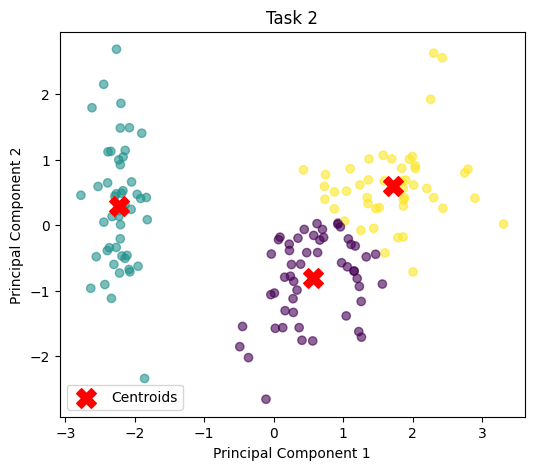

In [7]:
plt.figure(figsize=(6, 5))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis', alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='r', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Task 2")
plt.legend()
plt.show()

# **Task 3**

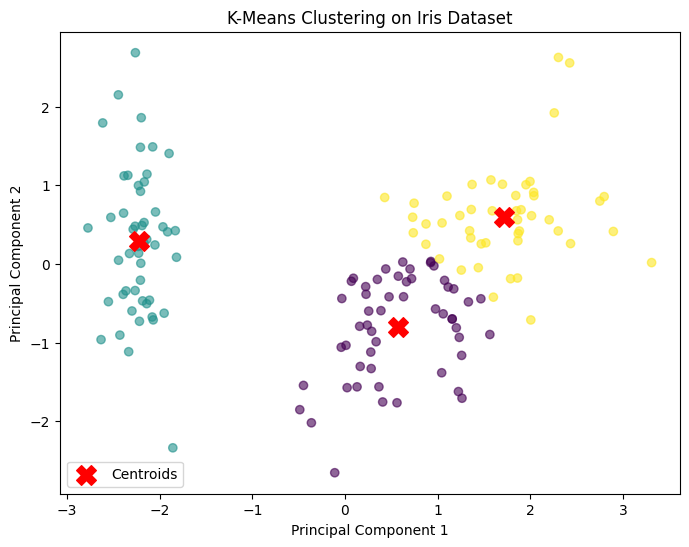

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled.iloc[:, :-1]), columns=['PC1', 'PC2'])
df_pca['cluster'] = df_scaled['cluster']
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis', alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()


# **Task 4**

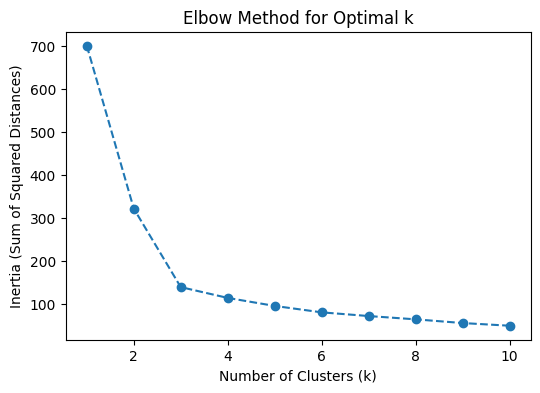

In [9]:

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.show()


# **Task 5**

In [10]:
cluster_summary = df_scaled.groupby('cluster').mean()
print(cluster_summary)


         sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                -0.050220         -0.883376           0.347738   
1                -1.014579          0.853263          -1.304987   
2                 1.135970          0.088422           0.996155   

         petal width (cm)  
cluster                    
0                0.281527  
1               -1.254893  
2                1.017526  


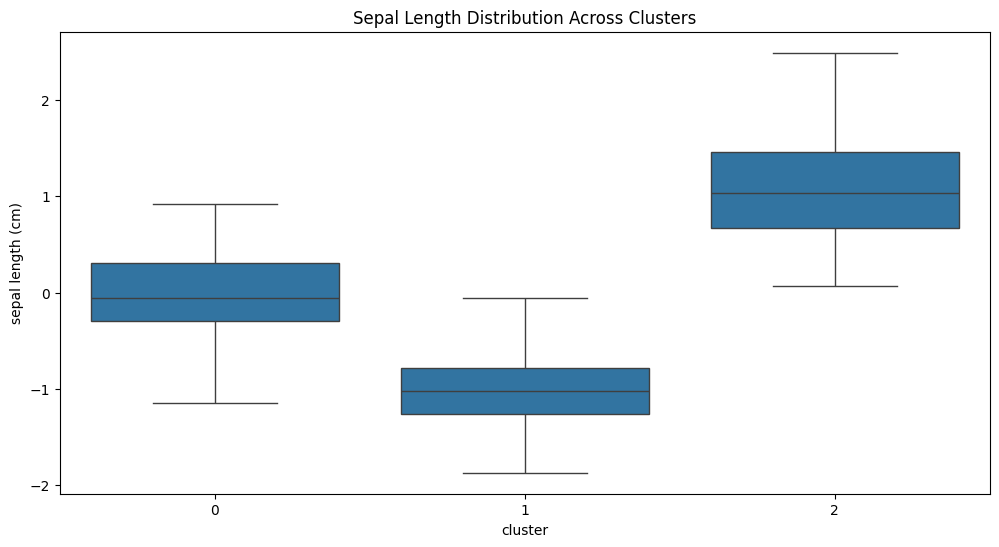

In [11]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_scaled['cluster'], y=df_scaled['sepal length (cm)'])
plt.title('Sepal Length Distribution Across Clusters')
plt.show()


In [12]:
df_scaled['cluster'].value_counts()

,count
cluster,
0,53
1,50
2,47


# **Task 6**

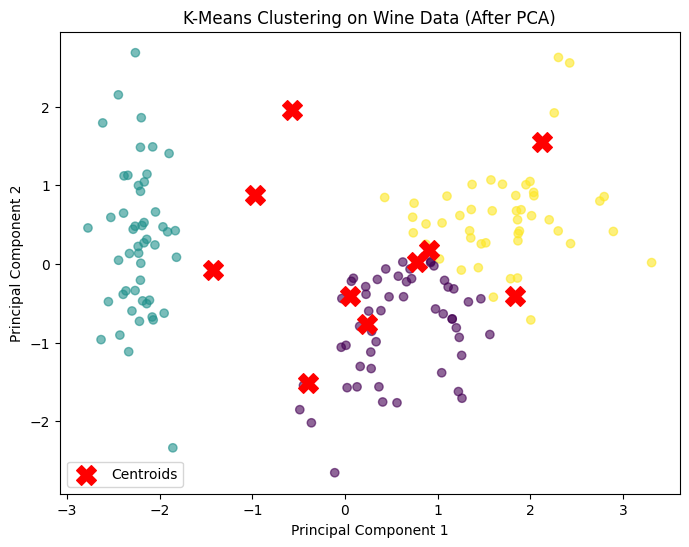

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis', alpha=0.6)

centroids_pca = kmeans.cluster_centers_
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on Wine Data (After PCA)')
plt.legend()
plt.show()


# **Task 7**

In [14]:
from sklearn.datasets import load_wine

In [15]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])

In [16]:
kmeans_default = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df_pca['Cluster_Default'] = kmeans_default.fit_predict(df_pca)


In [17]:
kmeans_random = KMeans(n_clusters=3, init='random', random_state=42, n_init=10)
df_pca['Cluster_Random'] = kmeans_random.fit_predict(df_pca)


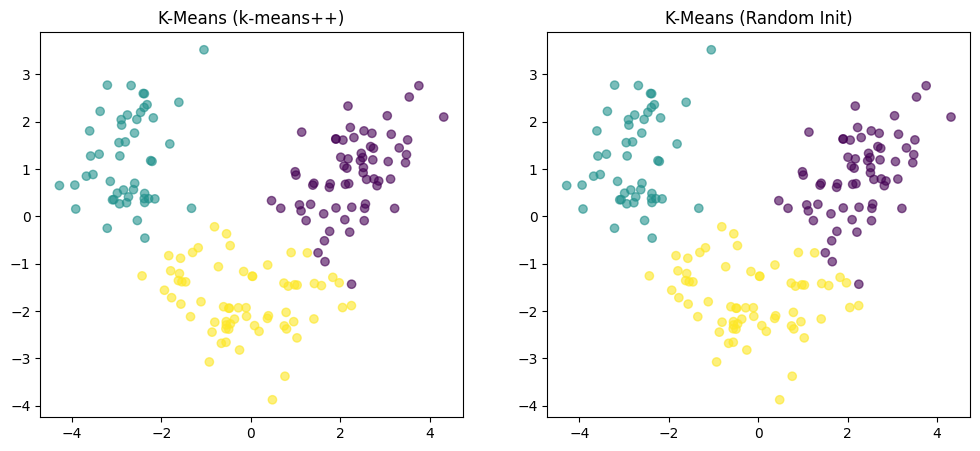

In [18]:
plt.figure(figsize=(12, 5))

# Default K-Means
plt.subplot(1, 2, 1)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster_Default'], cmap='viridis', alpha=0.6)
plt.title('K-Means (k-means++)')

# Random Init K-Means
plt.subplot(1, 2, 2)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster_Random'], cmap='viridis', alpha=0.6)
plt.title('K-Means (Random Init)')

plt.show()


# **Task 8**

In [19]:
from sklearn.datasets import make_blobs

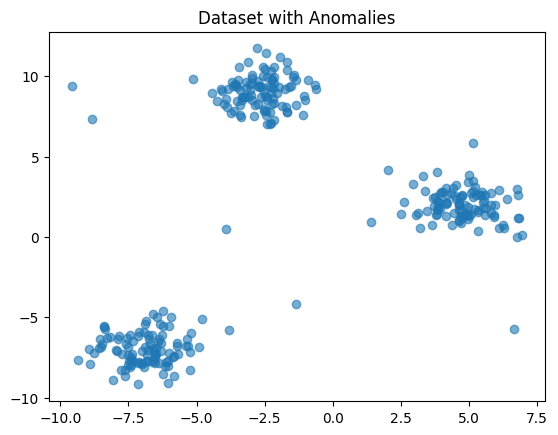

In [20]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
np.random.seed(42)
anomalies = np.random.uniform(low=-10, high=10, size=(10, 2))
X = np.vstack([X, anomalies])
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
plt.scatter(df['Feature1'], df['Feature2'], alpha=0.6)
plt.title('Dataset with Anomalies')
plt.show()

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_


In [22]:
from scipy.spatial.distance import cdist
distances = cdist(X_scaled, centroids, 'euclidean')
df['DistanceToCentroid'] = np.min(distances, axis=1)
threshold = np.percentile(df['DistanceToCentroid'], 95)
df['Anomaly'] = df['DistanceToCentroid'] > threshold
print(df[df['Anomaly']])


     Feature1  Feature2  Cluster  DistanceToCentroid  Anomaly
4   -8.917752 -7.888196        0            0.457244     True
55   5.154927  5.825901        1            0.591137     True
61   6.772912  0.021082        1            0.506514     True
63  -3.800746 -5.760535        0            0.631972     True
142 -4.818879 -5.124769        0            0.481538     True
160 -5.128943  9.836189        2            0.496681     True
185 -9.351272 -7.677005        0            0.532961     True
188  1.398611  0.948782        1            0.695563     True
221  2.515983  1.447415        1            0.458102     True
253  6.954537  0.105904        1            0.530203     True
303 -8.838328  7.323523        2            1.262030     True
304  2.022300  4.161452        1            0.644840     True
305 -9.588310  9.398197        2            1.388924     True
306  6.648853 -5.753218        1            1.228329     True
308 -3.915155  0.495129        0            1.259071     True
309 -1.3

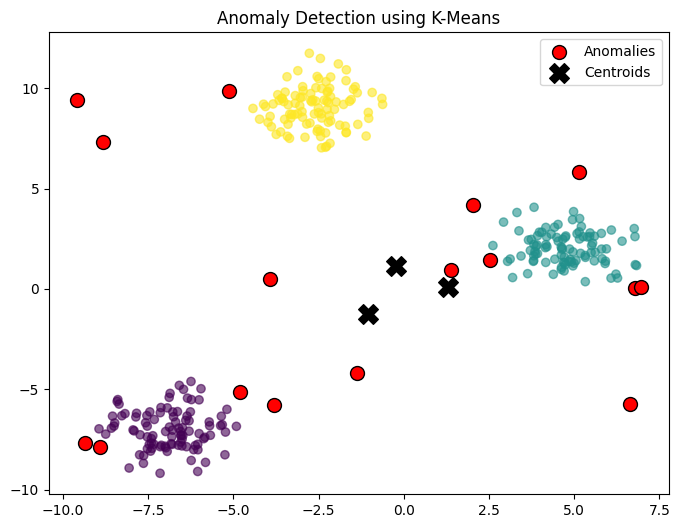

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis', alpha=0.6)

plt.scatter(df[df['Anomaly']]['Feature1'], df[df['Anomaly']]['Feature2'],
            color='red', edgecolors='black', s=100, label='Anomalies')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='X', s=200, color='black', label='Centroids')

plt.legend()
plt.title('Anomaly Detection using K-Means')
plt.show()
